In [1]:
import numpy as np
import pysindy as ps
from pysindy.feature_library import PolynomialLibrary, FourierLibrary, CustomLibrary

import matplotlib.pyplot as plt
from IPython.display import display, Latex

from generate_data import generate_hiv_data

In [ ]:
t = np.linspace(0, 100, 1001)
x0 = [1, 1, 1, 0, 0]

x, x_dot = generate_hiv_data(t=t, x0=x0)

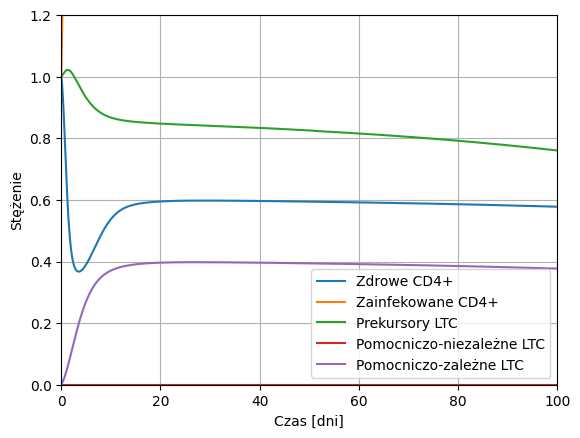

In [3]:
plt.plot(t, x[:, 0])
plt.plot(t, x[:, 1])
plt.plot(t, x[:, 2])
plt.plot(t, x[:, 3])
plt.plot(t, x[:, 4])
plt.legend(["Zdrowe CD4+", "Zainfekowane CD4+", "Prekursory LTC", "Pomocniczo-niezależne LTC", "Pomocniczo-zależne LTC"])
plt.ylim(0, max(x[:, 0]*1.2))
plt.xlim(0, max(t))
plt.xlabel("Czas [dni]")
plt.ylabel("Stężenie")

plt.grid()
plt.show()